In [82]:
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
os.environ["ACTINIA_USER"] = 'actinia-gdi'
os.environ["ACTINIA_PASSWORD"] = 'actinia-gdi'
os.environ["AUTH"] = 'actinia-gdi:actinia-gdi'
os.environ["ACTINIA_URL"] = 'http://localhost:8088'
sys.path.append(os.path.join(gisbase, "etc", "python"))

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
## Set your grass data location
gj.init("../actinia-core-data/grassdb", "nc_spm_08", "PERMANENT")

In [83]:
gs.parse_command("g.list", type="raster")

{}

In [ ]:
# actinia importer installation
!g.extension extension=importer url=https://github.com/mundialis/importer

# actinia exporter installation
!g.extension extension=exporter url=https://github.com/mundialis/exporter

# ace (actinia command execution) tool
!g.extension extension=ace url=https://github.com/mundialis/ace

In [60]:
!ace --help

Allows the execution of single GRASS GIS command or a list of GRASS GIS commands on an actinia REST service.

Usage:
 ace [-adlmrvs] [grass_command=string] [script=string] [location=value]
   [mapset=value] [list_jobs=value] [info_job=value] [kill_job=value]
   [create_location=value] [delete_location=value] [create_mapset=value]
   [delete_mapset=value] [render_raster=value] [render_vector=value]
   [render_strds=value] [--help] [--verbose] [--quiet] [--ui]

Flags:
  -a   Request the version of the actinia server
  -d   Dry run: just print the JSON request and do not send the generated request to the server
  -l   List locations the user has access to
  -m   List mapsets within specified location
  -r   List raster maps of mapsets of specified location
  -v   List vector maps of mapsets of specified location
  -s   List STRDS of mapsets of specified location

Parameters:
    grass_command   GRASS GIS command to be executed
           script   Script file from which all all commands wi

## List GRASS Locations User has Access to

In [61]:
!ace -l

['nc_spm_08', 'latlong_wgs84', 'utm32n']


## List Mapsets User has Access to in Location

In [84]:
!ace location="nc_spm_08" -m

{'accept_datetime': '2022-03-11 02:36:40.719362',
 'accept_timestamp': 1646966200.7193584,
 'api_info': {'endpoint': 'listmapsetsresource',
              'method': 'GET',
              'path': '/api/v3/locations/nc_spm_08/mapsets',
              'request_url': 'http://localhost:8088/api/v3/locations/nc_spm_08/mapsets'},
 'datetime': '2022-03-11 02:36:40.739305',
 'exception': {'message': 'AsyncProcessError:  Unable to create a temporary '
                          'GIS database, Exception: AsyncProcessError:  '
                          'Invalid mapset <nc_spm_08_grass7> in location '
                          '<nc_spm_08>',
               'traceback': ['  File '
                             '"/usr/lib/python3.8/site-packages/actinia_core/rest/ephemeral_processing.py", '
                             'line 1767, in run\n'
                             '    self._execute()\n',
                             '  File '
                             '"/usr/lib/python3.8/site-packages/actinia_co

In [72]:
!ace location="nc_spm_08" create_mapset="test"

Trying to create mapset test
{'accept_datetime': '2022-03-11 02:08:44.747500',
 'accept_timestamp': 1646964524.7474983,
 'api_info': {'endpoint': 'mapsetmanagementresourceadmin',
              'method': 'POST',
              'path': '/api/v3/locations/nc_spm_08/mapsets/test',
              'request_url': 'http://localhost:8088/api/v3/locations/nc_spm_08/mapsets/test'},
 'datetime': '2022-03-11 02:08:44.917895',
 'http_code': 200,
 'message': 'Mapset <test> successfully created.',
 'process_chain_list': [{'1': {'flags': 'l', 'module': 'g.mapsets'}}],
 'process_log': [{'executable': 'g.mapsets',
                  'id': '1',
                  'parameter': ['-l'],
                  'return_code': 0,
                  'run_time': 0.05014324188232422,
                  'stderr': ['Available mapsets:', ''],
                  'stdout': 'PERMANENT\n'}],
 'process_results': {},
 'progress': {'num_of_steps': 1, 'step': 1},
 'resource_id': 'resource_id-106934aa-538e-49c9-ad2e-b40a1ea21ba5',
 'stat

In [85]:
!ace location="nc_spm_08" -m

['PERMANENT', 'landsat', 'test', 'user1']


To list all raster maps available in the specified mapset belonging to the provided location nc_spm_08, run:

In [86]:
!ace location="nc_spm_08" mapset="PERMANENT" -r

['aspect',
 'basin_50K',
 'boundary_county_500m',
 'cfactorbare_1m',
 'cfactorgrow_1m',
 'el_D782_6m',
 'el_D783_6m',
 'el_D792_6m',
 'el_D793_6m',
 'elev_lid792_1m',
 'elev_ned_30m',
 'elev_srtm_30m',
 'elev_state_500m',
 'elevation',
 'elevation_shade',
 'facility',
 'geology_30m',
 'lakes',
 'landclass96',
 'landcover_1m',
 'landuse96_28m',
 'lsat7_2002_10',
 'lsat7_2002_20',
 'lsat7_2002_30',
 'lsat7_2002_40',
 'lsat7_2002_50',
 'lsat7_2002_61',
 'lsat7_2002_62',
 'lsat7_2002_70',
 'lsat7_2002_80',
 'ncmask_500m',
 'ortho_2001_t792_1m',
 'roadsmajor',
 'slope',
 'soilsID',
 'soils_Kfactor',
 'streams_derived',
 'towns',
 'urban',
 'zipcodes',
 'zipcodes_dbl']


In [89]:
!ace location="nc_spm_08" mapset="PERMANENT" -v

['P079214',
 'P079215',
 'P079218',
 'P079219',
 'boundary_county',
 'boundary_municp',
 'bridges',
 'busroute1',
 'busroute11',
 'busroute6',
 'busroute_a',
 'busroutesall',
 'busstopsall',
 'census_wake2000',
 'censusblk_swwake',
 'comm_colleges',
 'elev_lid792_bepts',
 'elev_lid792_cont1m',
 'elev_lid792_randpts',
 'elev_lidrural_mrpts',
 'elev_lidrural_mrptsft',
 'elev_ned10m_cont10m',
 'firestations',
 'geodetic_pts',
 'geodetic_swwake_pts',
 'geology',
 'geonames_NC',
 'geonames_wake',
 'hospitals',
 'lakes',
 'nc_state',
 'overpasses',
 'poi_names_wake',
 'precip_30ynormals',
 'precip_30ynormals_3d',
 'railroads',
 'roadsmajor',
 'schools_wake',
 'soils_general',
 'soils_wake',
 'streams',
 'streets_wake',
 'swwake_10m',
 'urbanarea',
 'usgsgages',
 'zipcodes_wake']


In [87]:
!ace location="nc_spm_08" grass_command="g.list raster"

http://localhost:8088/api/v3/locations/nc_spm_08/processing_async_export
{'version': '1', 'list': [{'module': 'g.list', 'id': 'g.list_1804289383', 'inputs': [{'param': 'type', 'value': 'raster'}, {'param': 'separator', 'value': 'newline'}]}]}
actinia-gdi
Resource status accepted
Polling: https://localhost:8088/api/v3/resources/actinia-gdi/resource_id-9343fa22-6161-4df9-b67c-08a07eaf41a2
^C
Traceback (most recent call last):
  File "/home/coreywhite/.grass8/addons/scripts/ace", line 775, in <module>
    main()
  File "/home/coreywhite/.grass8/addons/scripts/ace", line 733, in main
    send_poll_commands(commands=[split_grass_command(grass_command), ], mapset=mapset)
  File "/home/coreywhite/.grass8/addons/scripts/ace", line 576, in send_poll_commands
    r = requests.get(poll_url, auth=ACTINIA_AUTH)
  File "/usr/lib/python3/dist-packages/requests/api.py", line 76, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/lib/python3/dist-packages/requests/api.py", line

In [ ]:
!ace location="nc_spm_08" mapset="PERMANENT" grass_command="g.region -p"

[]


In [127]:
!ace list_jobs="all"

resource_id-6810643c-e737-43bb-8afa-db6af28b8fc8 finished 2022-03-11 03:14:57.574257
resource_id-3d18bdfe-5f69-4a59-82b3-b683ef686925 error 2022-03-11 01:02:27.461569
resource_id-2e6fc977-2a04-4bf2-acd8-5a7b8837969c finished 2022-03-11 03:11:34.855975
resource_id-f4f09d20-ae33-4aad-9b4a-6c21d322c8ab finished 2022-03-11 02:57:04.160480
resource_id-91f0e143-283a-4a1b-8cfa-fd8fa271fe7e finished 2022-03-11 01:23:33.000305
resource_id-47d3f6fc-df17-4679-87c8-32a1c05bb03b finished 2022-03-11 01:56:18.597980
resource_id-9ed03ec5-b681-44da-9884-cd891f239a0b finished 2022-03-11 03:52:45.304367
resource_id-4d66beee-8465-45aa-abc9-a812bc9cd9d5 finished 2022-03-11 02:09:58.179175
resource_id-68c8219c-f9e0-469e-a309-446249e4fe70 finished 2022-03-11 02:17:26.992185
resource_id-9f60c0e5-7556-40ca-847a-831023d31650 finished 2022-03-11 02:10:12.026436
resource_id-a14de036-a01a-4400-a20d-3972c9215ce7 finished 2022-03-11 03:50:39.783243
resource_id-533ee520-692f-4cbd-8a86-e1f379668063 error 2022-03-11 02

In [36]:
!curl -u 'actinia-gdi:actinia-gdi' -X GET -i "http://localhost:8088/api/v3/locations"

HTTP/1.1 200 OK
Server: gunicorn/20.0.4
Date: Fri, 11 Mar 2022 01:01:02 GMT
Connection: keep-alive
Content-Type: application/json
Content-Length: 72
Access-Control-Allow-Origin: *

{"locations":["nc_spm_08","latlong_wgs84","utm32n"],"status":"success"}


In [37]:
!curl -u 'actinia-gdi:actinia-gdi' -X GET "http://localhost:8088/api/v3/locations/latlong_wgs84/mapsets/modis_ndvi_global/strds/ndvi_16_5600m/raster_layers"

{"accept_datetime":"2022-03-11 01:02:27.424893","accept_timestamp":1646960547.4248927,"api_info":{"endpoint":"strdsrastermanagement","method":"GET","path":"/api/v3/locations/latlong_wgs84/mapsets/modis_ndvi_global/strds/ndvi_16_5600m/raster_layers","request_url":"http://localhost:8088/api/v3/locations/latlong_wgs84/mapsets/modis_ndvi_global/strds/ndvi_16_5600m/raster_layers"},"datetime":"2022-03-11 01:02:27.461569","exception":{"message":"AsyncProcessError:  Unable to create a temporary GIS database, Exception: AsyncProcessError:  Unable to link all required mapsets into temporary location. Missing or un-accessible mapset <modis_ndvi_global> in location <latlong_wgs84>","traceback":["  File \"/usr/lib/python3.8/site-packages/actinia_core/rest/ephemeral_processing.py\", line 1767, in run\n    self._execute()\n","  File \"/usr/lib/python3.8/site-packages/actinia_core/rest/strds_raster_management.py\", line 294, in _execute\n    self._create_temp_database(mapsets=self.required_mapsets)\n"

In [97]:
!ace location="nc_spm_08" render_raster="elev_state_500m"

Trying to render raster_layers map elev_state_500m of mapset PERMANENT


Trying to render raster_layers map elev_state_500m of mapset PERMANENT
http://localhost:8088/api/v3/locations/nc_spm_08/mapsets/PERMANENT/raster_layers/elev_state_500m/render?width=800&height=600


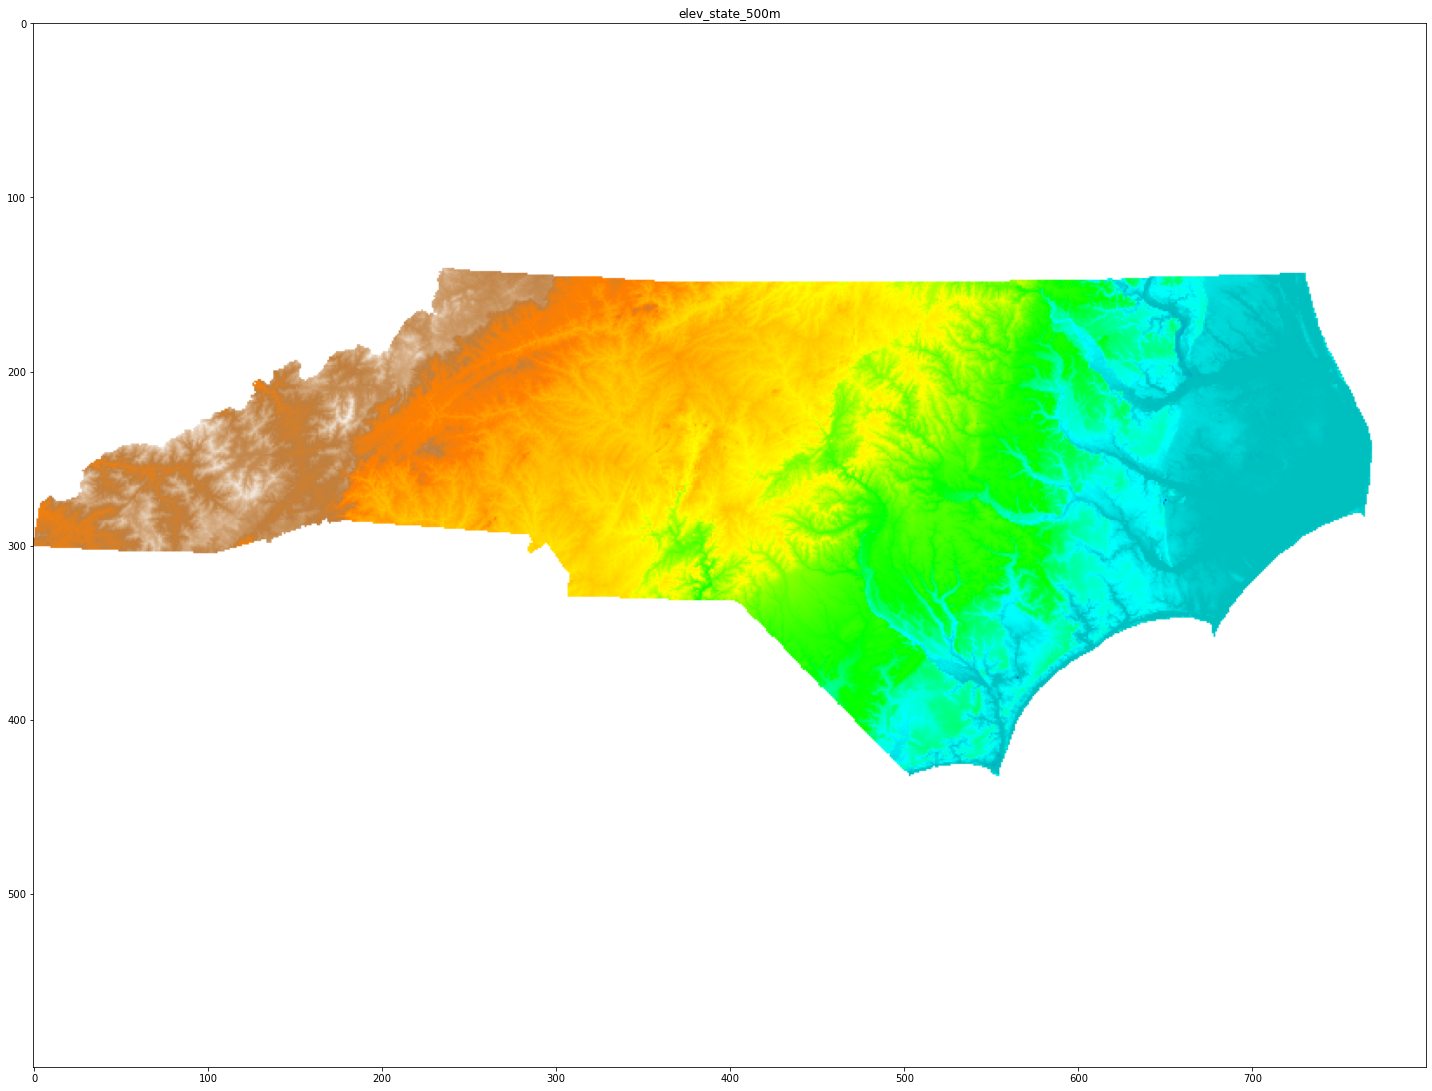

In [116]:
def show_rendered_map(map_name, map_type):
    
    import requests
    from pprint import pprint
    
    """Show a rendered map with the size of 800x600 pixel
    Args:
        map_name: The name of the raster map with optional mapset (name@mapset)
    """

    fig, ax = plt.subplots(figsize=(20, 18))
# f, ax = plt.subplots(figsize=(7, 6))

#     os.environ["ACTINIA_USER"] = 'actinia-gdi'
    # ACTINIA_AUTH = 'actinia-gdi:actinia-gdi'
    ACTINIA_AUTH = ("actinia-gdi", "actinia-gdi")
    LOCATION = 'nc_spm_08'
    mapset = 'PERMANENT'
    ACTINIA_VERSION = 'v3'
    ACTINIA_URL = 'http://localhost:8088'
    
    if "@" in map_name:
        map_name, mapset = map_name.split("@")
    else:
        mapset = gs.read_command("g.mapset", "p").strip()

    print(f"Trying to render {map_type} map {map_name} of mapset {mapset}")
    url = f"{ACTINIA_URL}/api/{ACTINIA_VERSION}/locations/{LOCATION}/mapsets" \
        f"/{mapset}/{map_type}/{map_name}/render?width=800&height=600"
    print(url)
    r = requests.get(url, auth=ACTINIA_AUTH)
    if r.status_code != 200:
        pprint(r.text)
    else:
        from PIL import Image
        import io

        fp = io.BytesIO(r.content)
        image = Image.open(fp)
        imgplot = plt.imshow(image)
        ax.set_title(map_name)

        plt.tight_layout() 

show_rendered_map("elev_state_500m","raster_layers")

Trying to render elevation of mapset PERMANENT
http://localhost:8088/api/v3/locations/nc_spm_08/mapsets/PERMANENT/render_shade?shade=elevation_shade?color=elevation
400
'{"message": {"color": "The name of the raster layer associated with color"}}\n'


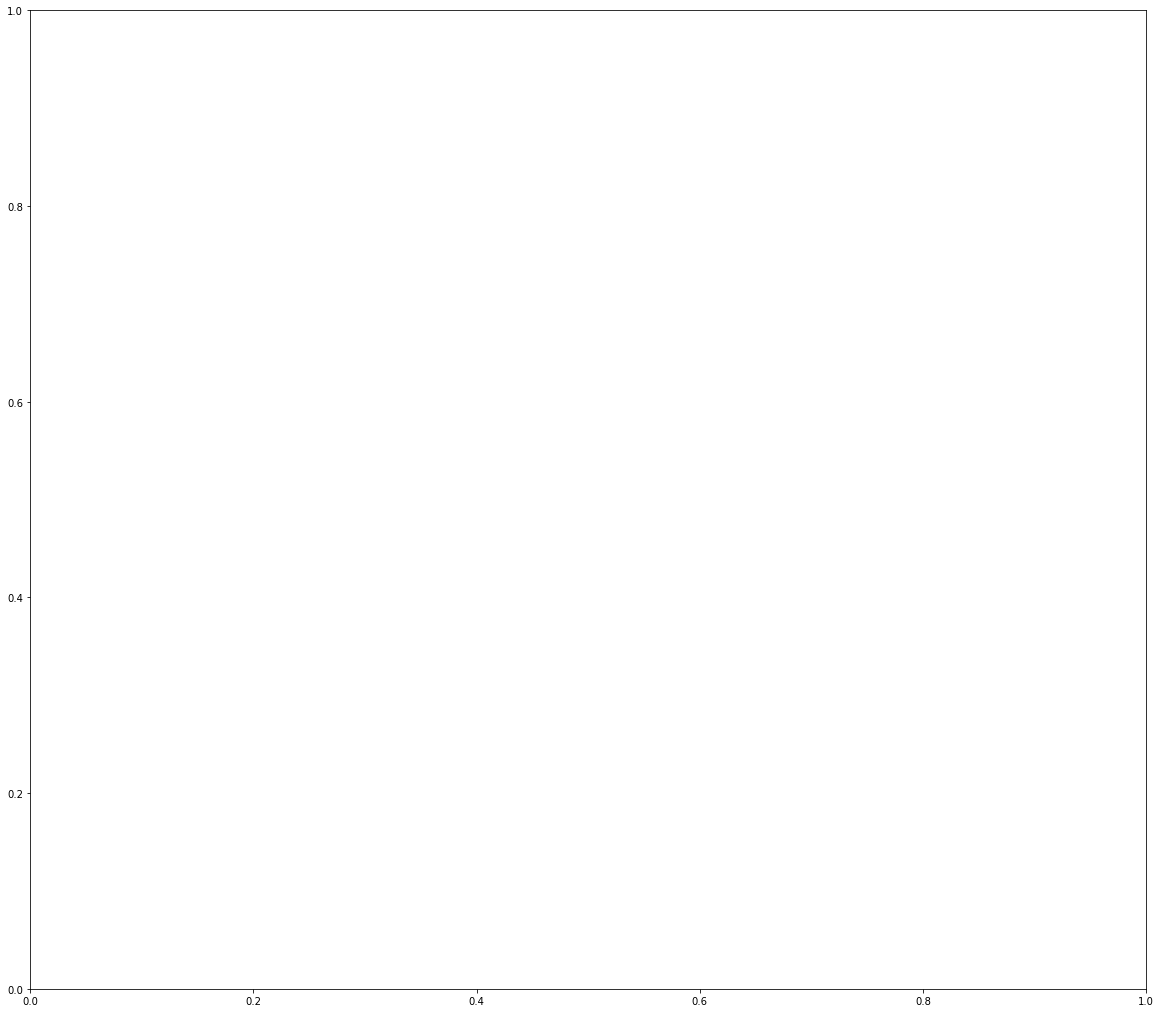

In [126]:
def show_rendered_shaded_map(map_name, map_shade):
    
    import requests
    from pprint import pprint
    
    """Show a rendered map with the size of 800x600 pixel
    Args:
        map_name: The name of the raster map with optional mapset (name@mapset)
    """

    fig, ax = plt.subplots(figsize=(20, 18))

    ACTINIA_AUTH = ("actinia-gdi", "actinia-gdi")
    LOCATION = 'nc_spm_08'
    mapset = 'PERMANENT'
    ACTINIA_VERSION = 'v3'
    ACTINIA_URL = 'http://localhost:8088'
    
    if "@" in map_name:
        map_name, mapset = map_name.split("@")
    else:
        mapset = gs.read_command("g.mapset", "p").strip()

    print(f"Trying to render {map_name} of mapset {mapset}")
    url = f"{ACTINIA_URL}/api/{ACTINIA_VERSION}/locations/{LOCATION}/mapsets" \
        f"/{mapset}/render_shade?shade={map_shade}?color=elevation"
        
    #?color={map_name}?width=800.0&height=800.0"
    print(url)
    r = requests.get(url, auth=ACTINIA_AUTH)
    if r.status_code != 200:
        pprint(r.status_code)
        pprint(r.text)
    else:
        from PIL import Image
        import io

        fp = io.BytesIO(r.content)
        image = Image.open(fp)
        imgplot = plt.imshow(image)
        ax.set_title(map_name)

        plt.tight_layout() 

show_rendered_shaded_map('elevation','elevation_shade')

In [110]:
help(gj.interact_display)

Help on module grass.jupyter.interact_display in grass.jupyter:

NAME
    grass.jupyter.interact_display

DESCRIPTION
    # AUTHOR(S): Caitlin Haedrich <caitlin DOT haedrich AT gmail>
    #
    # PURPOSE:   This module contains functions for interactive display
    #            in Jupyter Notebooks.
    #
    # COPYRIGHT: (C) 2021 Caitlin Haedrich, and by the GRASS Development Team
    #
    #            This program is free software under the GNU General Public
    #            License (>=v2). Read the file COPYING that comes with GRASS
    #            for details.

CLASSES
    builtins.object
        InteractiveMap
    
    class InteractiveMap(builtins.object)
     |  InteractiveMap(width=400, height=400)
     |  
     |  This class creates interative GRASS maps with folium.
     |  
     |  Basic Usage:
     |  >>> m = InteractiveMap()
     |  >>> m.add_vector("streams")
     |  >>> m.add_raster("elevation")
     |  >>> m.add_layer_control()
     |  >>> m.show()
     |  
     |  M

In [133]:
!ace -d location="nc_spm_08" grass_command="g.extension -l" 

{
  "version": "1",
  "list": [
    {
      "module": "g.extension",
      "id": "g.extension_1804289383",
      "flags": "l",
      "inputs": [
        {
          "param": "operation",
          "value": "add"
        },
        {
          "param": "prefix",
          "value": "$GRASS_ADDON_BASE"
        }
      ]
    }
  ]
}


In [134]:
!ace -d location="nc_spm_08" script="scripts/install_grass_plugins.sh"

{
  "version": "1",
  "list": [
    {
      "module": "g.extension",
      "id": "g.extension_1804289383",
      "inputs": [
        {
          "param": "extension",
          "value": "r.futures.pga"
        },
        {
          "param": "operation",
          "value": "add"
        },
        {
          "param": "prefix",
          "value": "$GRASS_ADDON_BASE"
        }
      ]
    },
    {
      "module": "g.extension",
      "id": "g.extension_1804289383",
      "inputs": [
        {
          "param": "extension",
          "value": "r.futures.potential"
        },
        {
          "param": "operation",
          "value": "add"
        },
        {
          "param": "prefix",
          "value": "$GRASS_ADDON_BASE"
        }
      ]
    },
    {
      "module": "g.extension",
      "id": "g.extension_1804289383",
      "inputs": [
        {
          "param": "extension",
          "value": "r.futures.potsurface"
        },
        {
          "param": "operation",
        

In [164]:
!ace -d location="nc_spm_08" grass_command="r.info elevation" | jq 

{
  "version": "1",
  "list": [
    {
      "module": "r.info",
      "id": "r.info_1804289383",
      "inputs": [
        {
          "param": "map",
          "value": "elevation"
        }
      ]
    }
  ]
}


In [177]:
import subprocess
import json
result = subprocess.run(['ace','-d location="nc_spm_08" grass_command="r.info elevation"'], capture_output=True)
print(result.stdout)

result = json.loads(result.stdout)

# gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
, 
print(result.stdout)
p_chain = !ace -d location="nc_spm_08" grass_command="r.info elevation" | jq -r ".list" 
print(p_chain)

b''


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
p_chain = !ace -d location="nc_spm_08" grass_command="r.info elevation"
def send_poll_commands(commands: List[List[str]], mapset: str = None) -> None:
    """Create the actinia process chain, send it to the actinia server
    and poll for the result
    Args:
        commands: A list of GRASS commands from the command line or from a script
        mapset: If mapset is set, then the processing will be performed in the mapset of the persistent user database
    """
    for command in commands:
        p_chain = create_actinia_process(command)
        if p_chain:
            PCHAIN["list"].append(p_chain)

    if DRY_RUN is True:
        print(simplejson.dumps(PCHAIN, sort_keys=False, indent=2 * ' '))
        return

    if mapset:
        url = f"{ACTINIA_URL}/api/{ACTINIA_VERSION}/locations/{LOCATION}/" \
            f"mapsets/{mapset}/processing_async"
    else:
        url = f"{ACTINIA_URL}/api/{ACTINIA_VERSION}/locations/{LOCATION}" \
            "/processing_async_export"

    print(url)
    print(PCHAIN)
    print(ACTINIA_USER)

    req = requests.post(url, json=PCHAIN, auth=ACTINIA_AUTH)
    if req.status_code not in [200, 201]:
        msg = ''
        try:
            data = simplejson.loads(req.text)
            if 'message' in data:
                msg = f": {data['message']}"
        except Exception:
            msg = req.text
        grass.fatal(_(f"ERROR posting to url '{url}'{msg}"))
    try:
        data = simplejson.loads(req.text)
    except Exception:
        grass.fatal(_(req.text))
        return

    print("Resource status", data["status"])

    poll_url = data["urls"]["status"]

    print("Polling:", poll_url)

    while True:
        r = requests.get(poll_url, auth=ACTINIA_AUTH)

        try:
            data = simplejson.loads(r.text)
            print("Resource poll status:", data["status"])
            print(data["message"])

            final_status = data["status"]
            if data["status"] == "finished" or data["status"] == "error" or data["status"] == "terminated":
                break
            time.sleep(1)
        except Exception as a:
            raise

    print("--------------------------------------------------------------------------")

    if r.status_code == 200:

        if final_status == "terminated":
            print(r.text)
            return

        for entry in data["process_log"]:
            if entry["stdout"]:
                print(entry["stdout"])
            if entry["stderr"][0]:
                pprint(entry["stderr"])
        pprint(data["urls"])
    else:
        print(r.text)